## Introduction

## Prediction of Individuals with High Obesity Risk Using a Random Forest Classifier

Obesity is a predominant health issue affecting individual lives and healthcare systems globally. It is a complex healthcare problem characterized by uncontrolled weight gain resulting from rapid fat accumulation in the body. The 2016 statistics from the World Health Organization indicated that 39% of adults aged 18 and above were overweight, and 13% were obese (Yagin et al. 2023). Since 2016, it is believed that the numbers have been on an upward trend. Further, the WHO defines obesity as abnormal fat accumulation and associates the problem with energy imbalance between calories consumed and those utilized (Safaei et al., 2021). In this project, we aim to build a random forest classifier to help predict individuals with a high obesity risk based on the important features.Prediction is becoming increasingly critical in healthcare, offering the potential to identify individuals at higher risk of obesity and implement preventive measures. By leveraging predictive models, healthcare professionals can intervene early, potentially saving lives and mitigating the severe economic repercussions associated with obesity-related healthcare costs.The dataset was obtained from the Kaggle website and encompasses demographic, health, and lifestyle variables. The random forest classifier is a useful supervised machine learning tool that generates results by randomly sampling the features and building several decision trees. The choice of the random forest classifier was inspired by its ability to address the problem of missing values, its efficiency in handling binary data, and its capability to deal with the challenge of overfitting. 



In [35]:
# Importing the required Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings

In [36]:
import pandas as pd
file_path = 'C:\\Users\\brian\\Desktop\\final-project-Brian13Noble\\data\\obesity_rates.csv'
obesity_rates = pd.read_csv(file_path, encoding='utf-8')
obesity_rates
mask = ['Country', 'obesity_rate']
obesity_rates_dataset = obesity_rates[mask]
obesity_rates_dataset.dropna()

,Country,obesity_rate
0,India,5.5
1,China,6.5
2,United States,42.7
6,Brazil,25.9
7,Bangladesh,5.4
...,...,...
208,Nauru,58.1
209,Tuvalu,62.2
210,Wallis and Futuna,70.4
211,Niue,61.0


## Visualizing the Obesity Rates Globally

The plot shows that many countries are battling with high obesity rates with the highest being 77% in Tonga. The data was recorded at different years, implying that the figures could be different in 2024.

In [52]:
import plotly.express as px
obesity_rates_dataset_cleaned = obesity_rates_dataset.dropna(subset=['obesity_rate'])
fig = px.scatter(obesity_rates_dataset_cleaned, 
                 x='Country', 
                 y='obesity_rate', 
                 hover_name='Country', 
                 hover_data={'obesity_rate': True},
                 color='obesity_rate', 
                 size='obesity_rate', 
                 size_max=30)
fig.update_layout(title='Obesity Rates of Countries Globally',
                  xaxis_title='Longitude', 
                  yaxis_title='Latitude')

# Show the plot
fig.show()
plt.savefig('Obesity Rates of Countries Globally')


<Figure size 640x480 with 0 Axes>

## Motivation

While humanity faces myriad challenges, health remains one of the most critical due to its economic strain on individuals, families, societies, and governments. This strain is evident in resource consumption and the decline of the active and productive population. The importance of healthcare was evident during the COVID-19 pandemic when hospitals and medical professionals were overwhelmed by the influx of patients. Similarly, obesity presents a concerning issue as it is linked to an increase in other chronic ailments such as cancer, diabetes, and mental health disorders. In 2019, researchers observed a strong correlation between being overweight or obese and the risks of hospitalization and intensive care unit admissions (Popkin et al., 2020). Through an in-depth analysis of obesity, we aim to identify impactful interventions, policies, and programs that can address the issue holistically. Studying the problem is crucial for identifying at-risk populations, implementing targeted prevention strategies, and enhancing healthcare delivery. Ultimately, reducing obesity will lead to healthier lifestyles, happier and more productive societies, and lower healthcare costs.


## Contribution

While several methods have been utilized in studying obesity, applying Machine Learning and AI techniques is a work in progress. Therefore, through this research, I aim to contribute by building a random forest classifier, an innovative supervised machine learning approach to uncover relationships and patterns in datasets. Moreover, the algorithm can help healthcare providers to develop personalized interventions depending on an individual's risk. Extending beyond the nutritional patterns to explore other risk factors such as family history, gender, age, transportation methods, and alcohol consumption, among other factors, increases knowledge and understanding of the complex nature of obesity, increasing the chances of developing more comprehensive and effective solutions. 

## Motivation

The correlation matrix and random forest classifier are the main methods used to study the dataset. The correlation matrix complements the Random Forest Classifier by exploring the relationship between variables in the obesity dataset. Generally, the correlation matrix examines the strength and direction of linear relationships. The correlation matrix aids in feature selection before model building and helps visualize multicollinearity, a measure of how variables are correlated with each other.

Likewise, the Random Forest Classifier is a useful tool that increases accuracy and robustness by building multiple decision trees. The RF classifier can handle complex datasets, nonlinear relationships, binary variables, and interactions. During the training phase, the model builds multiple decisions by selecting a random subset of features for training each tree. During prediction, the model aggregates the predictions from individual trees to make the final classification decision. 


In [38]:
file_path = "C:\\Users\\brian\\Desktop\\final-project-Brian13Noble\\data\\obesity_data.csv"
obesity_data = pd.read_csv(file_path, encoding='utf-8')
display(obesity_data.head(5))
print(obesity_data.shape)



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


(2111, 17)


In [39]:
# Check Duplicates
obesity_data.duplicated().sum()
obesity_data = obesity_data.drop_duplicates()


In [40]:
obesity_data.rename(columns={'Age': 'age', 'Gender': 'gender', 'Height':'height', 'Weight': 'weight',
                             'CALC': 'drink_alcohol', 'FAVC': 'caloric_food', 'NObeyesdad':'obesity_level',
                             'NCP': 'daily_meals', 'FCVC': 'vegetable_meals', 'SCC': 'monitor_calories',
                             'SMOKE': 'smoke', 'CH2O': 'water_volume', 'FAF': 'physical_activity',
                             'family_history_with_overweight': 'family_history','MTRANS': 'transport_method', 
                             'TUE': 'tech_time', 'CAEC': 'food_between_meals'}, inplace=True)

In [41]:
obesity_data['age'] = obesity_data['age'].astype(int)
obesity_data.info()
obesity_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2087 non-null   int32  
 1   gender              2087 non-null   object 
 2   height              2087 non-null   float64
 3   weight              2087 non-null   float64
 4   drink_alcohol       2087 non-null   object 
 5   caloric_food        2087 non-null   object 
 6   vegetable_meals     2087 non-null   float64
 7   daily_meals         2087 non-null   float64
 8   monitor_calories    2087 non-null   object 
 9   smoke               2087 non-null   object 
 10  water_volume        2087 non-null   float64
 11  family_history      2087 non-null   object 
 12  physical_activity   2087 non-null   float64
 13  tech_time           2087 non-null   float64
 14  food_between_meals  2087 non-null   object 
 15  transport_method    2087 non-null   object 
 16  obesity_lev

age                   0
gender                0
height                0
weight                0
drink_alcohol         0
caloric_food          0
vegetable_meals       0
daily_meals           0
monitor_calories      0
smoke                 0
water_volume          0
family_history        0
physical_activity     0
tech_time             0
food_between_meals    0
transport_method      0
obesity_level         0
dtype: int64

In [42]:
obesity_counts = obesity_data['obesity_level'].value_counts()
obesity_counts

obesity_levels = obesity_counts.index.tolist()
obesity_levels

['Obesity_Type_I',
 'Obesity_Type_III',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Normal_Weight',
 'Overweight_Level_I',
 'Insufficient_Weight']

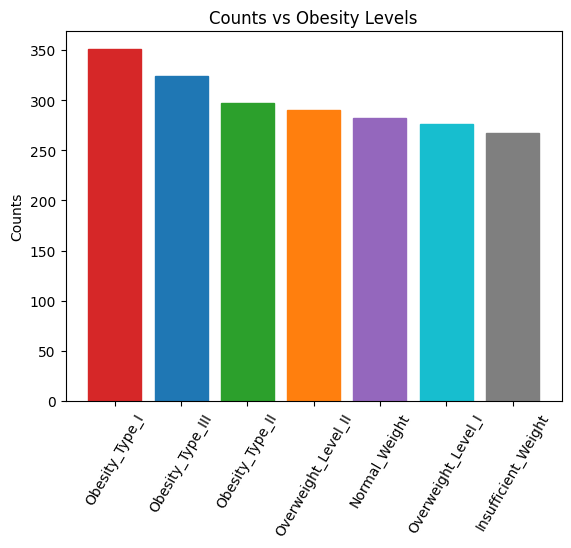

In [43]:
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(obesity_levels, obesity_counts)
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:cyan', 'tab:gray']  
for i, bar in enumerate(bars):
    bar.set_color(bar_colors[i])

ax.set_ylabel('Counts')
ax.set_title('Counts vs Obesity Levels')
plt.xticks(rotation=60)
plt.show()






From the plot above, the dataset shows that majority of the respondents reported battling with obesities type I, II and III

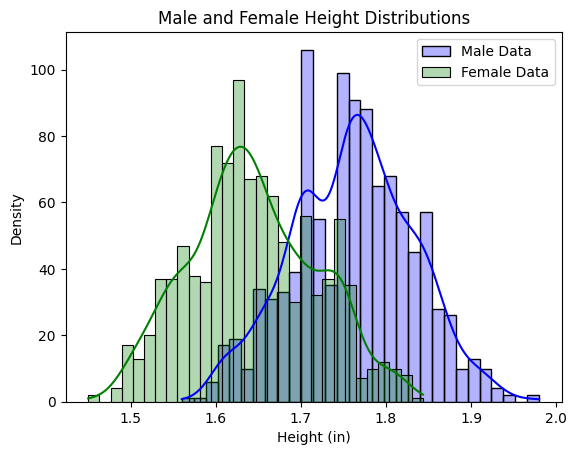

In [44]:
# Filter data for males and females
male_data = obesity_data[obesity_data['gender'] == 'Male']
female_data = obesity_data[obesity_data['gender'] == 'Female']

fig, ax = plt.subplots()

# Plot histograms for male and female height samples
sns.histplot(male_data['height'], bins=30, color="b", alpha=0.3, label="Male Data", kde=True)
sns.histplot(female_data['height'], bins=30, color="g", alpha=0.3, label="Female Data", kde=True)

# Add legend, title, and axis labels
ax.legend()
ax.set_title("Male and Female Height Distributions")
ax.set_xlabel("Height (in)")
ax.set_ylabel("Density")

plt.show()


## Correlation Matrix for the Dataset features
As the correlation matrix shows, age, gender, height, weight, and transport method were the signficant features that can be used to predict obesity level.

In [45]:
from module import map_strings_to_integers
obesity_data_mapped = map_strings_to_integers(obesity_data)

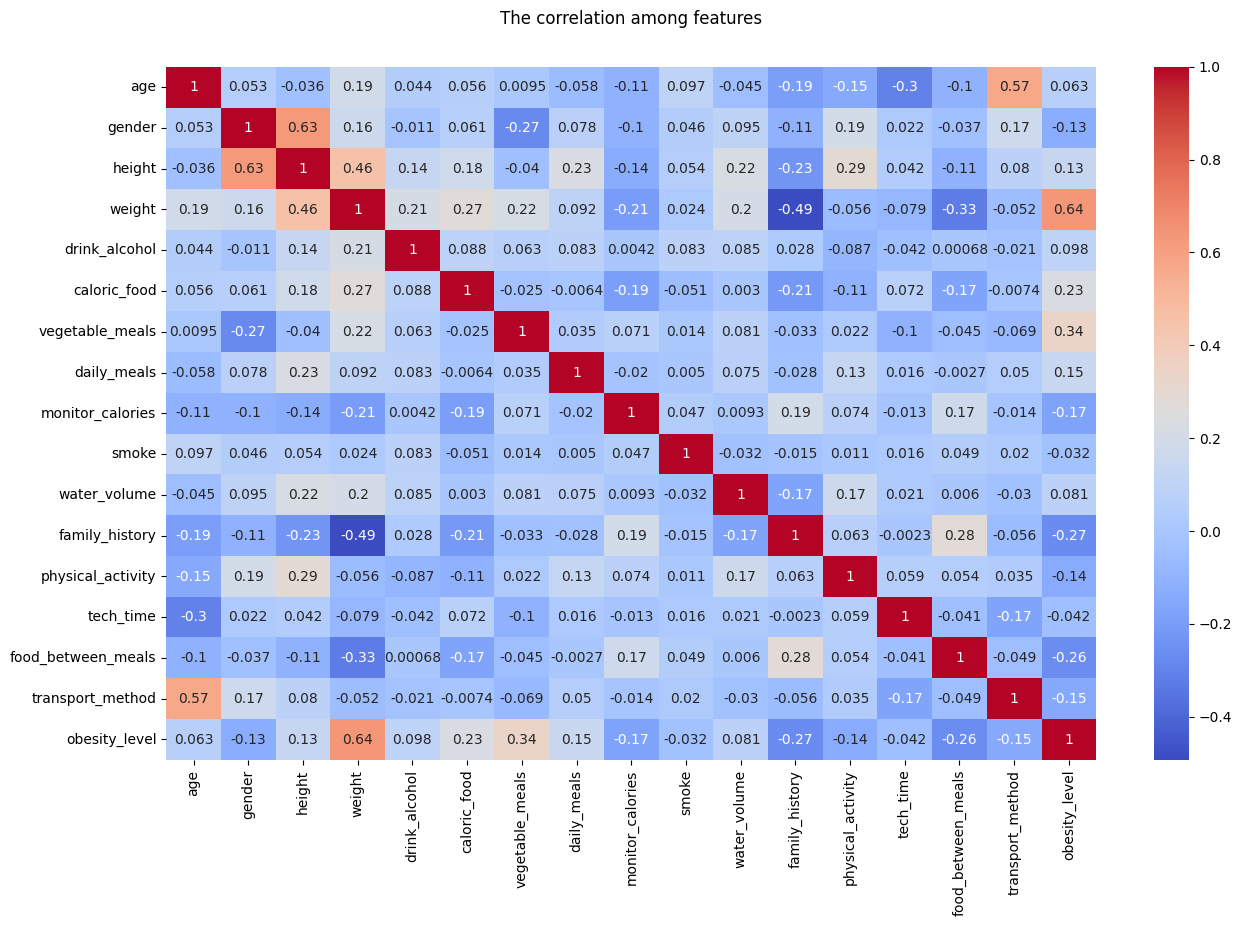

In [46]:
plt.figure(figsize=(15,9))
sns.heatmap(obesity_data_mapped.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

In [47]:
# Select features and target variable
features = ['age', 'gender', 'height', 'weight', 'transport_method']
target = 'obesity_level'
random_forest_data = obesity_data_mapped[features + [target]]

## Visualizing the features selected for the Random Forest Classifier

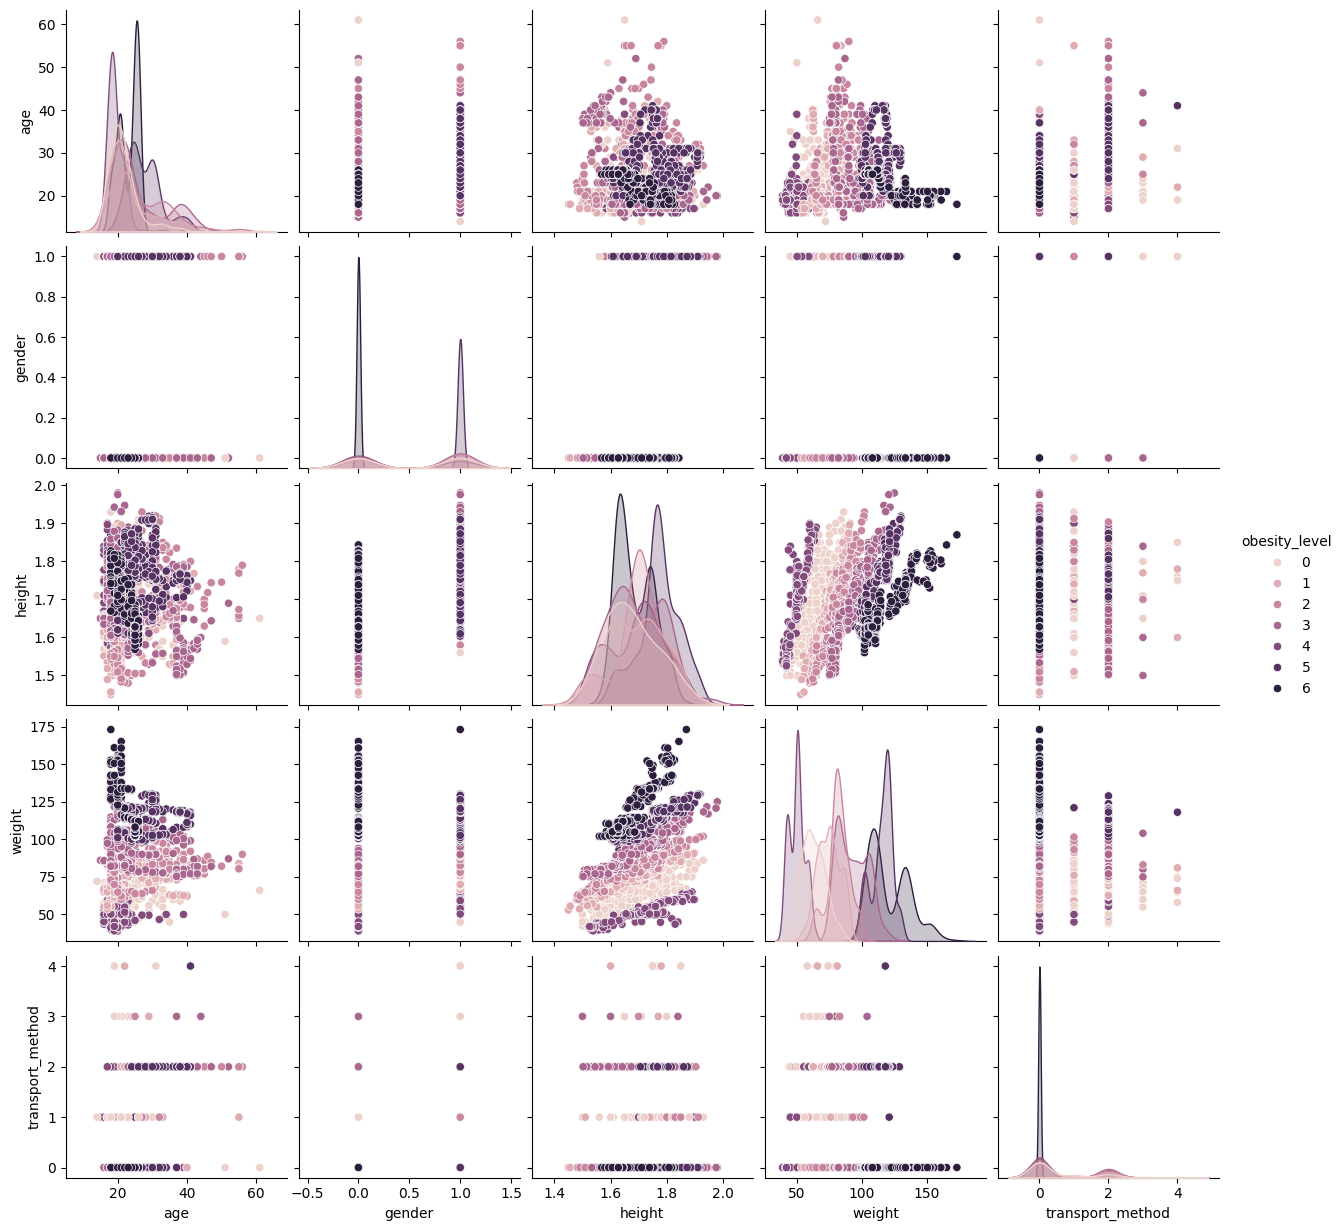

In [48]:
# Visualizing the Random Forest Dataset
sns.pairplot(random_forest_data, diag_kind='kde', hue=target)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y)
X = random_forest_data.drop(columns=[target])
y = random_forest_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## The Accuracy of the Model
The model was trained and tested and the output showed that it was 95% accuacy. That implied that out of the all the predictions the model made, 95% of them were correct.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 1. Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 2. Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9545454545454546

## Confusion Matrix
As the confusion matrix shows, the model correctly predicted the levels of obesity for the test dataset based on the important features. Even though, there are instances of misclassifications, they are minimal implying that the model's performance was excellent.

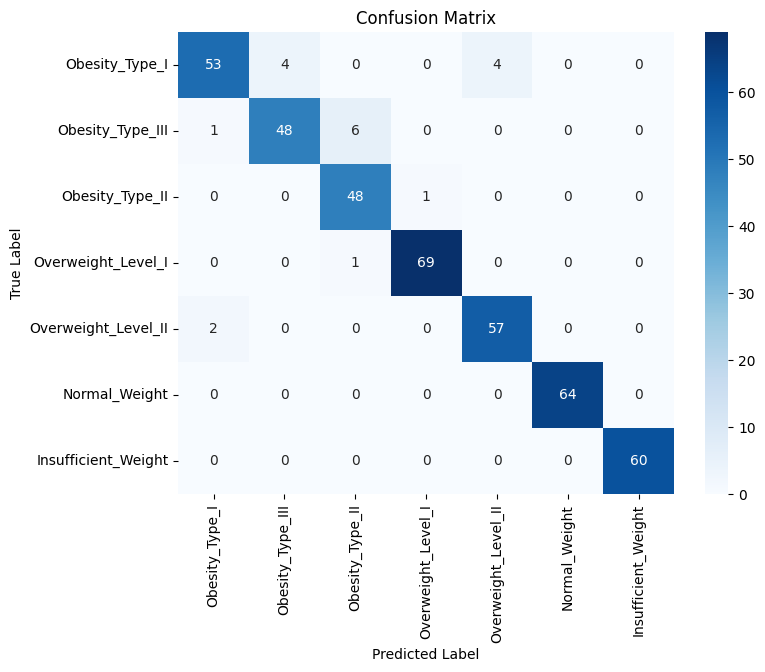

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (replace 'class_labels' with your actual class labels)
class_labels = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Conclusion
In conclusion, the study provided crucial insights into the problem of obesity from a global perspective. While many findings revolve around nutrition and lifestyle habits, the study also showed that age, gender, weight, and height are other factors that could be used to classify levels of obesity among individuals. By utilizing advanced machine learning techniques such as the random forest classifier, the study showed the potential of predictive models in addressing human challenges, especially in healthcare. Even though the model showed a 95% accuracy rate in predicting, there is still room for improvement, considering that many variables that would be significant were not included. Further research using different datasets and features could be necessary, considering the method used to collect the data.  The findings restate the importance of targeted interventions and other early detection and prevention policies to address obesity globally.

## References
1. Popkin, B. M., Du, S., Green, W. D., Beck, M. A., Algaith, T., Herbst, C. H., Alsukait, R. F., Alluhidan, M., Alazemi, N., & Shekar, M. (2020). Individuals with Obesity and COVID‐19: a Global Perspective on the Epidemiology and Biological Relationships. Obesity Reviews, 21(11). https://doi.org/10.1111/obr.13128

2. Safaei, M., Sundararajan, E. A., Driss, M., Boulila, W., & Shapi’i, A. (2021). A Systematic Literature Review on obesity: Understanding the Causes & Consequences of Obesity and Reviewing Various Machine Learning Approaches Used to Predict Obesity. Computers in Biology and Medicine, 136(104754). https://doi.org/10.1016/j.compbiomed.2021.104754
3. Yagin, F. H., Gülü, M., Gormez, Y., Castañeda-Babarro, A., Colak, C., Greco, G., Fischetti, F., & Cataldi, S. (2023). Estimation of Obesity Levels with a Trained Neural Network Approach optimized by the Bayesian Technique. Applied Sciences, 13(6), 3875. https://doi.org/10.3390/app13063875